<a href="https://colab.research.google.com/github/JeromeEngena/data-analysis-portfolio-projects/blob/main/astronomical_data_viz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import libraries to be used
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# read the data set
star_df = pd.read_csv("https://drive.google.com/uc?id=1BQVc6MHjQFtDC9iP1isT_K4ojVe_Oil-")

In [ ]:
# view 10 random data records
star_df.sample(10)


,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
52,3834,272000.00000,1183.00000,-9.20,5,Red,M
105,14245,231000.00000,42.00000,-6.12,4,Blue,O
177,11000,170000.00000,1779.00000,-9.90,5,Blue-White,B
103,17120,235000.00000,83.00000,-6.89,4,Blue,O
21,7740,0.00049,0.01234,14.02,2,White,A
3,2800,0.00020,0.16000,16.65,0,Red,M
164,8927,239000.00000,35.00000,-7.34,4,Blue,O
126,2935,0.00087,0.09320,16.88,0,Red,M
19,3441,0.03900,0.35100,11.18,1,Red,M
13,3628,0.00550,0.39300,10.48,1,Red,M


In [ ]:
# view the general structure of the data set
star_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


In [ ]:
# create a directory to store the viusalisations
folder_name = 'star_plots'
os.makedirs(folder_name, exist_ok=True)
base_dir = f'/content/{folder_name}/'

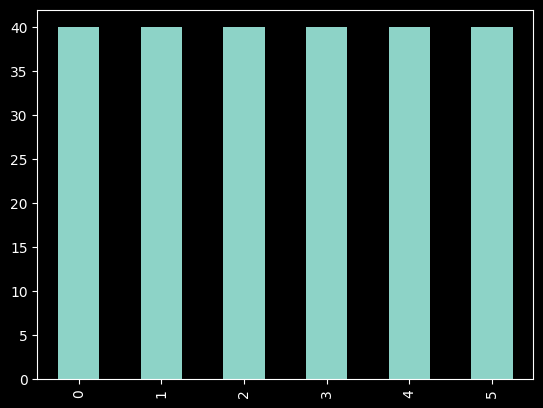

In [ ]:
star_df['Star type'].value_counts().plot(kind='bar')
plt.show()

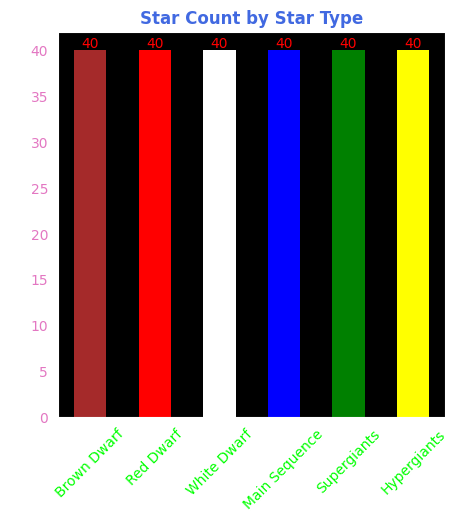

In [ ]:
plt.figure(figsize=(5,5))
plt.style.use('dark_background')
ax = star_df['Star type'].value_counts().plot(kind='bar', color=['brown', 'red', 'white', 'blue', 'green', 'yellow'])
ax.bar_label(ax.containers[0], color='red')
plt.title('Star Count by Star Type', color='royalblue', weight='bold')
plt.ylabel('# of Stars', color='white', fontsize=11)
plt.yticks(color='tab:pink')
plt.xticks(ticks=[0,1,2,3,4,5], labels=['Brown Dwarf', 'Red Dwarf', 'White Dwarf', 'Main Sequence', 'Supergiants', 'Hypergiants'], rotation=45, color='lime')
plt.savefig(base_dir+'star_count_barplot.png')
plt.show()

Using Seaborn

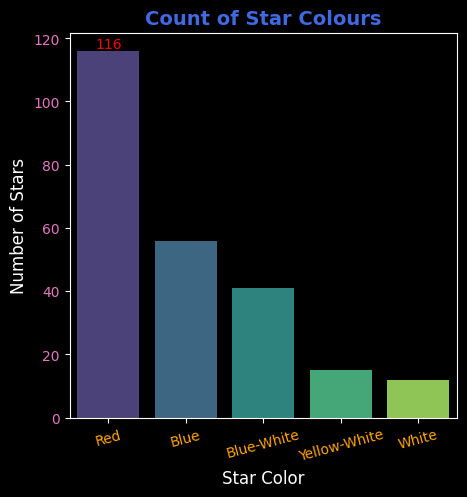

In [ ]:
plt.figure(figsize=(5,5))
ax = sns.barplot(x=star_df['Star color'].value_counts().index,
                 y=star_df['Star color'].value_counts(),
                 hue=star_df['Star color'].value_counts().index,
                 palette='viridis')
ax.bar_label(ax.containers[0], color='red')

plt.ylabel('Number of Stars', color='white', fontsize=12)
plt.xlabel('Star Color', color='white', fontsize=12)
plt.yticks(color='tab:pink')
plt.xticks(rotation=15, color='orange')
plt.title('Count of Star Colours', color='royalblue', fontsize=14, weight='bold')
plt.savefig(base_dir+'star_colours_viz.png')
plt.show()

In [ ]:
# Get a gist of the data again by checking the top 5 rows of the data set
star_df.head(5)

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


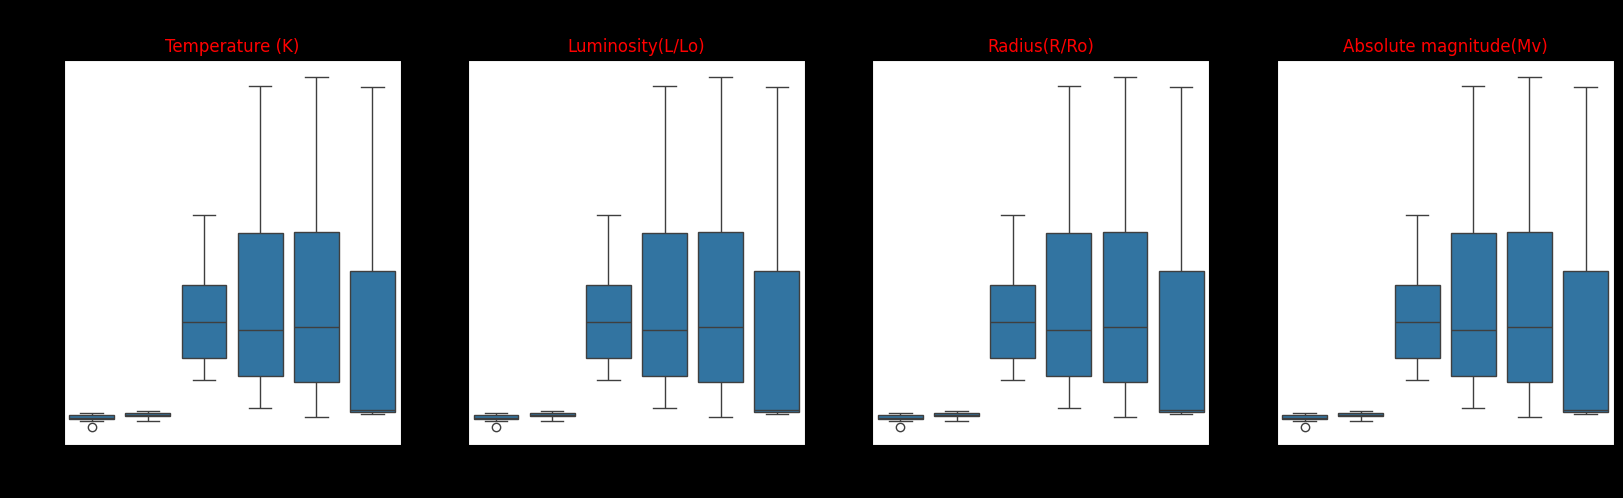

In [ ]:
# Visualise outliers in the data
plt.figure(figsize=(20,5))
plt.style.use('default')
plt.suptitle('Outliers in Numeric Features of Star Type', color='black', weight='bold')
for i in range(4):
  plt.subplot(1, 4, i+1)
  sns.boxplot(x=star_df['Star type'], y=star_df.iloc[:, 0])
  plt.title(star_df.columns[i], color='red')
  plt.ylabel('')

plt.savefig(base_dir+'star_type_boxplot.png')

In [ ]:
# Create a function to produce line subplots
def line_subplot(star_df, colours, i):
  plt.subplot(4, 1, i+1)
  plt.plot(star_df.iloc[:, i], color=colours[i])
  plt.title(star_df.columns[i], color='red')

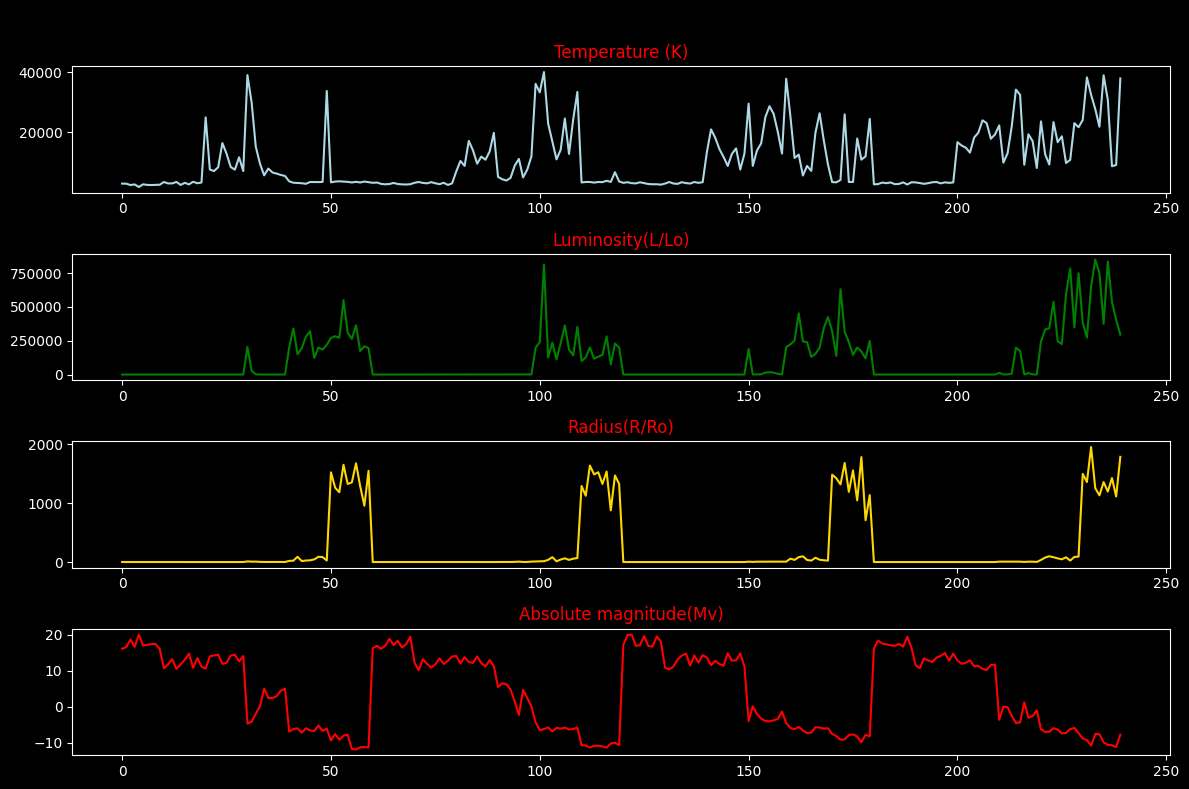

In [ ]:
# create lineplots
colours = ['lightblue', 'green', 'gold', 'red']
plt.figure(figsize=(12, 8))
plt.suptitle('Distribution of Numerical Features', color='black', fontsize=15, weight='bold')

for i in range(4):
  line_subplot(star_df, colours, i)

plt.tight_layout()
plt.savefig(base_dir+'line_sublpot.png')
plt.show()

<Figure size 1000x500 with 0 Axes>

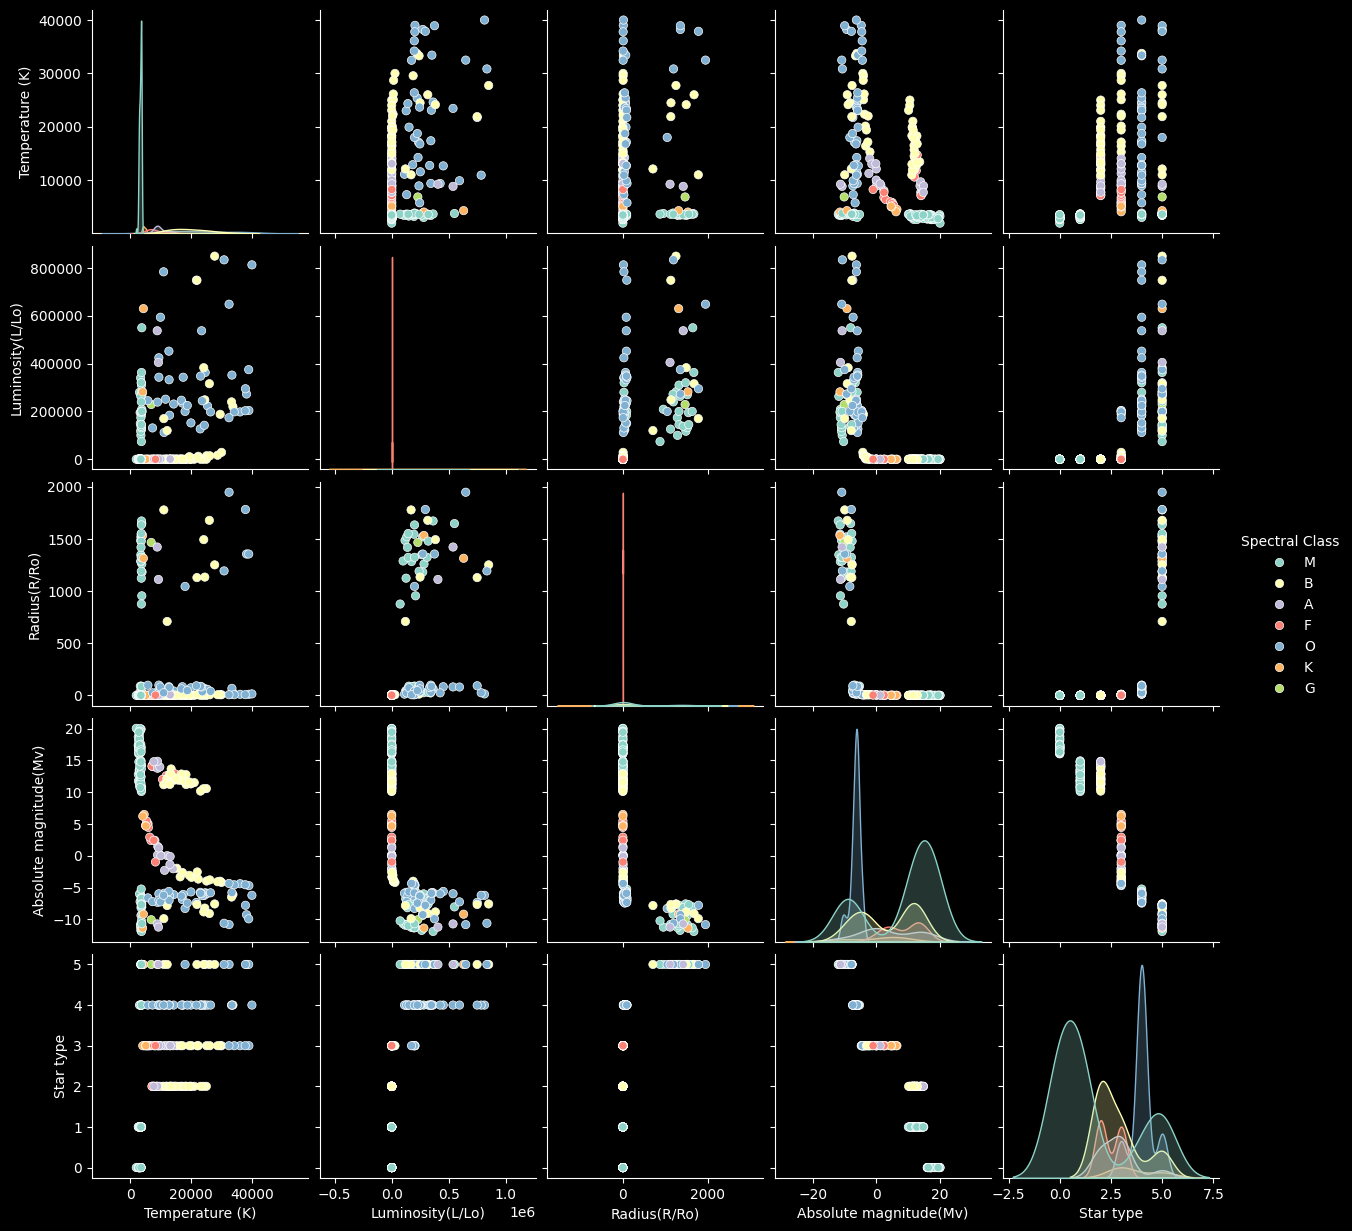

In [ ]:
# create pairplots for all the columns of data
plt.figure(figsize=(10,5))
sns.pairplot(star_df, hue='Spectral Class')
plt.savefig(base_dir+'pairplot')
plt.show()

In [ ]:
# creating an HR Diagram

# Arrays to be used in the for loop
star_type = star_df['Star type'].values
temperature = star_df['Temperature (K)'].values
abs_mag = star_df['Absolute magnitude(Mv)'].values

# Python dictionaries --> Made of key value pairs --> To be used to get properties of star_type
star_types = {
    0: {'label': 'Brown Dwarf', 'color': 'brown', 'size': 30, 'marker': '.'},
    1: {'label': 'Red Dwarf', 'color': 'red', 'size': 35, 'marker': '.'},
    2: {'label': 'White Dwarf', 'color': 'white', 'size': 40, 'marker': '.'},
    3: {'label': 'Main Sequence', 'color': 'cyan', 'size': 30, 'marker': 'o'},
    4: {'label': 'Supergiants', 'color': 'orange', 'size': 100, 'marker': 'o'},
    5: {'label': 'Hypergiants', 'color': 'maroon', 'size': 150, 'marker': 'o'}
}

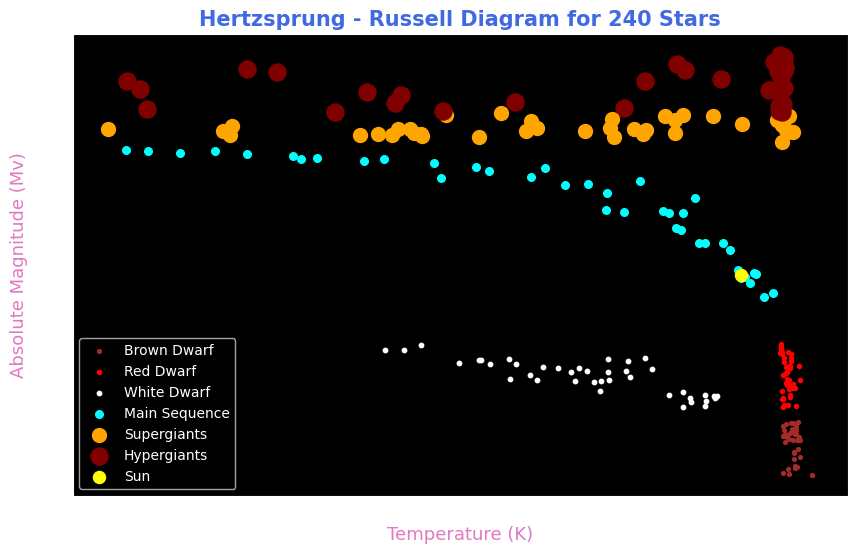

In [ ]:
# Plotting a HR Diagram for Temp vs Abs mag

# Empty list and set to store ax and label of star_type
axes = []
labels = set()

plt.figure(figsize=(10, 6))
plt.style.use('dark_background')

# For each and every star in the data
for i in range(len(star_type)):

  # Get its properties with its star_type from python dictonary
  properties = star_types[star_type[i]]

  # if label is not present in set labels
  if properties['label'] not in labels:
    # Then create the axis
    ax = plt.scatter(temperature[i], abs_mag[i],
                    s=properties['size'],
                    c=properties['color'],
                    marker=properties['marker'],
                    label=properties['label'])
    # Add it to axes list
    axes.append(ax)
    # Also add label to the labels set
    labels.add(properties['label'])
  # Else if the label already exist
  else:
    # Then don't save the axes nor add the label to labels set
    plt.scatter(temperature[i], abs_mag[i],
                s=properties['size'],
                c=properties['color'],
                marker=properties['marker'],
                label=properties['label'])

# Adding data for sun
ax_sun = plt.scatter(5778, 4.83, s=75, c="yellow", marker='o', label="Sun")
axes.append(ax_sun)
labels.add("Sun")

# Add title
plt.title(f"Hertzsprung - Russell Diagram for {len(star_type)} Stars", fontsize=15, color='royalblue', weight='bold')

# Add labels
plt.ylabel("Absolute Magnitude (Mv)", fontsize=13, color='tab:pink')
plt.xlabel("Temperature (K)", fontsize=13, color='tab:pink')

# Visualize the labels only for the axes handles
plt.legend(handles=axes)

# Invert the axes
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()

# Save Figure
plt.savefig(base_dir+'hr_diagram.png')
plt.show()

In [ ]:
# from google.colab import files
# !zip -r /content/starplots.zip /content/star_plots
# files.download('/content/starplots.zip')


  adding: content/star_plots/ (stored 0%)
  adding: content/star_plots/pairplot.png (deflated 3%)
  adding: content/star_plots/star_count_barplot.png (deflated 11%)
  adding: content/star_plots/star_colours_viz.png (deflated 10%)
  adding: content/star_plots/line_sublpot.png (deflated 7%)
  adding: content/star_plots/star_type_boxplot.png (deflated 30%)
  adding: content/star_plots/hr_diagram.png (deflated 7%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>